In [61]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score, recall_score, mean_squared_error,confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt
import itertools

In [86]:
def matrix_confuse_median(cm):
        it = (cm[0]).size
        n_class = (cm[0][0]).size
        
        cm_median = []
        
        for i in range(n_class):
            cm_median.append([])
            
        for i in range(it):
            median = []
            for j in range(len(cm)):
                median.append(cm[j].item(i))
                
            
            cm_median[int(i/n_class)].append(int(statistics.median(median)))

        
        array = np.asarray(cm_median)

        return array

def mensure(X,y,classifier):
    
    ac_ = []
    p_ = []
    r_ = []
    e_ = []
    cm_ = []
    
    #Cross Validation com kfold  = 10, separados de forma aleatoria
    kf = KFold(10, shuffle=True, random_state=1)
    
    for train_index,teste_index in kf.split(X,y):
        X_train, X_test = X[train_index],X[teste_index]
        y_train, y_test = y[train_index], y[teste_index]
 
        y_pred = classifier.fit(X_train, y_train).predict(X_test)
    
        ac = accuracy_score(y_test, y_pred)
        p = precision_score(y_test, y_pred,average='weighted') 
        r = recall_score(y_test, y_pred,average='weighted') 
        e = mean_squared_error(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        
        ac_.append(ac)
        p_.append(p)
        r_.append(r)
        e_.append(e)
        cm_.append(cm)
    
    #ac = statistics.median(ac_)
    p = statistics.median(p_)
    r = statistics.median(r_)
    e = statistics.median(e_)
    cm  = matrix_confuse_median(cm_)
    
    return ac_,p,r,e,cm

def predict(X,y,values,classifier):
    resp = ['Setosa','Versicolour','Virginica']
    test = np.array(values)
    classifier.fit(X, y)
    y_pred = classifier.predict(test)
    
    return resp[y_pred[0]]

def plot_confuse_matrix(cm,labels,title):
        cm = np.ceil(cm)
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm)
        plt.title(title)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + labels)
        ax.set_yticklabels([''] + labels)
        
        thresh = cm.max()/2
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j],horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")
        
        plt.tight_layout()
        plt.xlabel('Predito')
        plt.ylabel('Verdadeiro')
        plt.show()

def box_plot(results,names,title):
        fig = plt.figure()
        fig.suptitle(title)
        ax = fig.add_subplot(111)
        plt.boxplot(results)
        ax.set_xticklabels(names)
        plt.show()

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


SVM ac = 0.933333
Perceptron ac = 0.733333
Decision ac = 0.933333


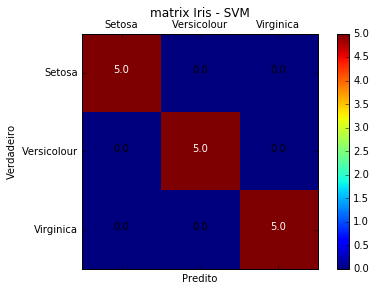

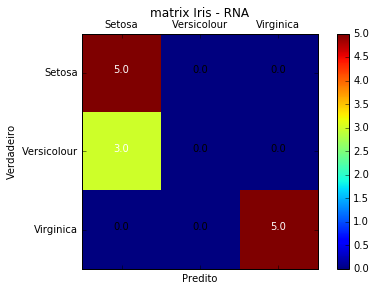

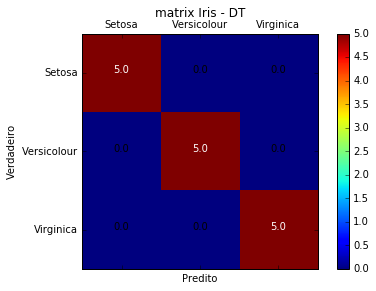

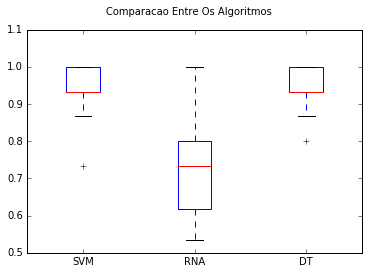

Virginica


/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [87]:
if __name__ == '__main__':
    
    #1. comprimento sepala em cm
    #2. Largura sepala em cm
    #3. comprimento da pétala em cm
    #4. largura da pétala em cm
    #5. classe:
    #- Iris Setosa
    #- Iris Versicolour
    #- Iris Virginica
    #Ex : teste = np.array([5,5,10,15])
    data = load_iris()
    X = data.data
    y = data.target
    
    #inicia algoritmos
    csvm = SVC(kernel='rbf', C=100, decision_function_shape='ovr')
    cl = Perceptron(n_iter=100)
    dt = DecisionTreeClassifier(random_state=0)
    
    #Utiliza de técnicias para mensurar os algoritmos iniciados acima
    ac_,p,r,e,cm = mensure(X,y,csvm)
    ac = statistics.median(ac_)
    ac2_,p2,r2,e2,cm2 = mensure(X,y,cl)
    ac2 = statistics.median(ac2_)
    ac3_,p3,r3,e3,cm3 = mensure(X,y,dt)
    ac3 = statistics.median(ac3_)
    print("SVM ac = %f"%ac)
    print("Perceptron ac = %f"%ac2)
    print("Decision ac = %f"%ac3)
    #Matriz de Confusao
    plot_confuse_matrix(cm,['Setosa','Versicolour','Virginica'],'matrix Iris - SVM')
    plot_confuse_matrix(cm2,['Setosa','Versicolour','Virginica'],'matrix Iris - RNA')
    plot_confuse_matrix(cm3,['Setosa','Versicolour','Virginica'],'matrix Iris - DT')
    #Box Plot
    box_plot([ac_,ac2_,ac3_],['SVM','RNA','DT'],'Comparacao Entre Os Algoritmos')
    
    #faz a predição comparado a um valor
    teste = [5,5,10,15]
    pred = predict(X,y,teste,cl)
    print(pred)
    